## <font color=blue>Ploynomial Regression</font>

`In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an n th degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E ( y | x ).`

In [1]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#check vesrions

print(f'Numpy : {np.__version__}')

Numpy : 1.16.5


### Sample DataSet

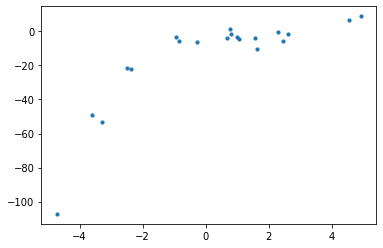

In [2]:
np.random.seed(0)
#np.random.normal(mu, sigma, 20)
x=2-3*np.random.normal(0,1,20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y,s=10)
plt.show()

### Apply linearRegression to above dataset

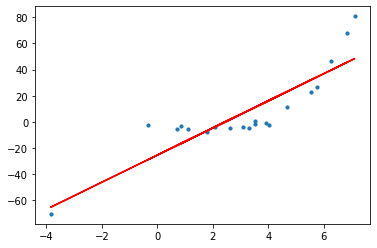

In [3]:
np.random.normal(0)
x=2 -3*np.random.normal(0,1,20)
y=x - 2*(x**2) + 0.5*(x**3) + np.random.normal(-3,3,20)

#tranferring data to add new axis
x=x[:,np.newaxis]
y=y[:,np.newaxis]

model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

plt.scatter(x,y,s=10)
plt.plot(x, y_pred, color='r')
plt.show()

<img src="SimpleLREq.png">

### Observation : 
<font color=Green>Under-fitting</font>

In [4]:
score = r2_score(y , y_pred)
print('R2 Score:',score)

R2 Score: 0.7737582858041104


### Increase order of feature

<img src="SimpleLREq.png">

<font color=Green>Still a linear model because we are increase order of features and not coefficients.</font>

<img src="PolyPipeline.png">

### Polynomial Regression with Degree=2

R2 Score: 0.8537647164420812


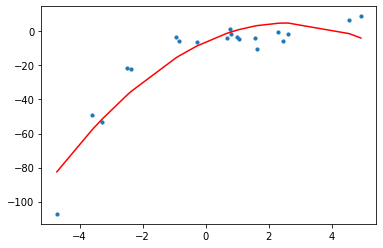

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

#transforming data to include another axis
x=x[:,np.newaxis]
y=y[:,np.newaxis]

polynomial_features=PolynomialFeatures(degree=2)
x_poly=polynomial_features.fit_transform(x)

model=LinearRegression()
model.fit(x_poly,y)
y_pred_poly=model.predict(x_poly)

rmse=np.sqrt(mean_squared_error(y,y_pred_poly))
r2=r2_score(y,y_pred_poly)
print('R2 Score:',r2)

plt.scatter(x,y,s=10)
# sort the values of x before line plot
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_pred_poly),key=sort_axis)
x,y_pred_poly=zip(*sorted_zip)
plt.plot(x,y_pred_poly,color='r')
plt.show()

### Observation :

<font color=Green>We are converting the features to higher order and training with LinearRegression</font>

### Polynomial Regression with Degree=3

R2 Score: 0.9830071790386679


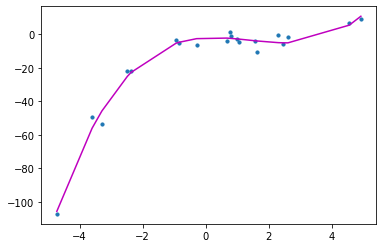

In [6]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

#transforming data to include another axis
x=x[:,np.newaxis]
y=y[:,np.newaxis]

polynomial_features=PolynomialFeatures(degree=3)
x_poly=polynomial_features.fit_transform(x)

model=LinearRegression()
model.fit(x_poly,y)
y_pred_poly=model.predict(x_poly)

rmse=np.sqrt(mean_squared_error(y,y_pred_poly))
r2=r2_score(y,y_pred_poly)
print('R2 Score:',r2)

plt.scatter(x,y,s=10)
# sort the values of x before line plot
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_pred_poly),key=sort_axis)
x,y_pred_poly=zip(*sorted_zip)
plt.plot(x,y_pred_poly,color='m')
plt.show()

### Observation:
<font color=Green>degree 3 fits the dataset even more</font>

### Polynomial Degree=20

R2 Score: 0.9982308265442509


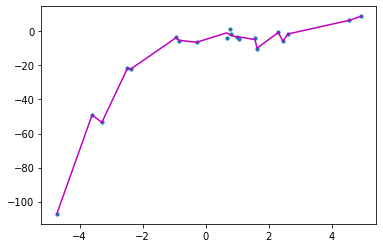

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

#transforming data to include another axis
x=x[:,np.newaxis]
y=y[:,np.newaxis]

polynomial_features=PolynomialFeatures(degree=20)
x_poly=polynomial_features.fit_transform(x)

model=LinearRegression()
model.fit(x_poly,y)
y_pred_poly=model.predict(x_poly)

rmse=np.sqrt(mean_squared_error(y,y_pred_poly))
r2=r2_score(y,y_pred_poly)
print('R2 Score:',r2)

plt.scatter(x,y,s=10)
# sort the values of x before line plot
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_pred_poly),key=sort_axis)
x,y_pred_poly=zip(*sorted_zip)
plt.plot(x,y_pred_poly,color='m')
plt.show()

## The Bias vs Variance trade-off:

- Bias:
    1. Simplistic assumptions of the model
    2. Higher the bias, lesser is the model able to capture pattern

- Variance:
    1. Error due to complex model trying to fit the data
    2. Over-fitting

**We can assume that a model with low bias and low variance is optimum, but its not possible choose both. Hence its a trade off!!**

<img src="BiasVarianceTradeoff.png">

### Advantages:
- Best Approx of relationship with dependent and independent variable
- fits wide range of curvature

### Disadvantage:
- Presence of outliers can affect the analysis as its too sensitive to outliers

### What about more than one feature?

<img src="multiplefeatuesEq.png">